# 보팅

## 기본 셋팅

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# 위스콘신 데이터 로드
cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [2]:
data_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

## 보팅 모델 생성

로지스틱 회귀와 KNN을 기반으로 하여 소프트 보팅 방식으로 보팅 분류기 생성(보팅 분류기 안에 있는 알고리즘들은 모두 분류 알고리즘인 것 같음) 사이킷런은 VotingClassifier 클래스를 이용하여 보팅 분류기를 생성 가능.(soft가 hard보다 성능이 좋기 때문에 soft 사용)

In [3]:
# 개별 모델은 로지스틱 회귀와 KNN 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9591
LogisticRegression 정확도: 0.9532
KNeighborsClassifier 정확도: 0.9298


C:\Users\hyunj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hyunj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

보팅을 해서 개별 분류기보다 약소하지만 정확도가 증가한 것을 확인할 수 있다. 하지만 무조건 보팅으로 여러 개의 분류기를 결합한다고 해서 무조건 개별 분류기보다 예측 성능이 향상되지는 않는다고 한다. 데이터의 특성과 분포 등 다양한 요건에 따라 오히려 개별 분류기 중 가장 좋은 분류기의 성능이 보팅했을 때보다 더 나을 수 있다.(이 경우는 보팅 분류기는 개별 분류기보다 더 데이터를 잘 설명)

# 랜덤 포레스트(배깅)

## 기본 세팅

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 보팅에서 사용한 데이터 세트를 그대로 사용


## 랜덤 포레스트 모델 생성 및 학습

In [5]:
# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9708


랜덤 포레스트가 그래도 앞의 보팅 분류기, 로지스틱 회귀 분류기, KNN 분류기보다는 좋은 성능을 보이는 것을 확인할 수 있음

## 랜덤 포레스트 하이퍼 파라미터 튜닝

In [6]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 200, 300, 500, 1000],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2)
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 300}
최고 예측 정확도: 0.9472


앙상블(랜덤포레스트)은 결정 트리의 개수가 많게 하는 것이 장점이지만 이 데이터 세트는 결정 트리의 개수가 적게 나오는 것이 더 데이터를 잘 설명하는 것처럼 보인다.

In [7]:
params = {
    'n_estimators':[10, 20, 30, 50, 100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2)
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 30}
최고 예측 정확도: 0.9497


## 튜닝된 하이퍼 파라미터로 재 학습 및 예측/평가

In [8]:
rf_clf_best1 = RandomForestClassifier(n_estimators=500, max_depth=6, min_samples_leaf=8, min_samples_split=8, random_state=0)
rf_clf_best1.fit(X_train , y_train)
pred = rf_clf_best1.predict(X_test)
print('첫번째 튜닝 예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

rf_clf_best2 = RandomForestClassifier(n_estimators=10, max_depth=6, min_samples_leaf=18, min_samples_split=8, random_state=0)
rf_clf_best2.fit(X_train , y_train)
pred = rf_clf_best2.predict(X_test)
print('두번째 튜닝 예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

첫번째 튜닝 예측 정확도: 0.9591
두번째 튜닝 예측 정확도: 0.9474


오히려 default가 더 정확도가 높은 것을 확인할 수 있다.

## 개별 feature들의 중요도 시각화

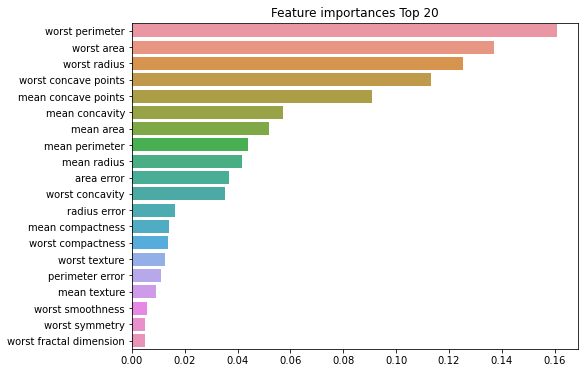

In [9]:
# 첫번째로 튜닝했던 모델의 정확도가 더 높기 때문에 이를 이용하여 중요도 시각화

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf_best1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=data_df.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

# Adaboost

## 기본 세팅

In [10]:
from sklearn.ensemble import AdaBoostClassifier

## 에이다부스트 모델 생성 및 학습

In [11]:
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)
pred = ada_clf.predict(X_test)
print('에이다 부스트 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

에이다 부스트 정확도 : 0.9708


에이다부스트의 결정 트리의 깊이를 조절하고 결정트리의 개수까지 임의로 조절하여 다시 학습 및 평가

In [12]:
from sklearn.tree import DecisionTreeClassifier
# 깊이가 3인 결정 트리 생성
tree_model = DecisionTreeClassifier(max_depth = 5)

ada_clf_2 = AdaBoostClassifier(base_estimator = tree_model, n_estimators = 1000)
ada_clf_2.fit(X_train, y_train)
pred = ada_clf_2.predict(X_test)
print('튜닝 후 에이다 부스트 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

튜닝 후 에이다 부스트 정확도 : 0.9591


튜닝 후 에이다 부스트가 오히려 정확도가 낮아진 것을 확인할 수 있다.

# GBM

## 기본셋팅

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

## GBM 모데 생성 및 학습 

In [14]:
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9591


## 하이퍼 파라미터 튜닝 및 학습

GBM에서는 경사 하강법을 사용한다고 하였으니 파라미터 learning_rate가 존재

In [15]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500, 1000],
    'learning_rate' : [0.001, 0.01,0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   20.7s finished


최적 하이퍼 파라미터:
 {'learning_rate': 0.01, 'n_estimators': 1000}
최고 예측 정확도: 0.9397


## 찾은 하이퍼파라미터를 적용하고 학습 및 평가

In [16]:
gb_clf_best = GradientBoostingClassifier(learning_rate = 0.001, n_estimators = 1000,random_state=0)
gb_clf_best.fit(X_train , y_train)
gb_pred = gb_clf_best.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('튜닝된 GBM 정확도: {0:.4f}'.format(gb_accuracy))

튜닝된 GBM 정확도: 0.9474


# XGBoost

## 기본 세팅

In [17]:
from xgboost import XGBClassifier

## 모델 생성 및 학습 

In [18]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

print('XGBoost 정확도: {0:.4f}'.format(xgb_accuracy))

[21:41:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost 정확도: 0.9649
